In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
data_train = pd.read_excel(r"./E-Commerce_train.xlsx")
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


In [36]:
data_train.duplicated().sum()

0

In [37]:
data_train.drop(['ID'],axis=1, inplace=True)

In [38]:
data_train.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


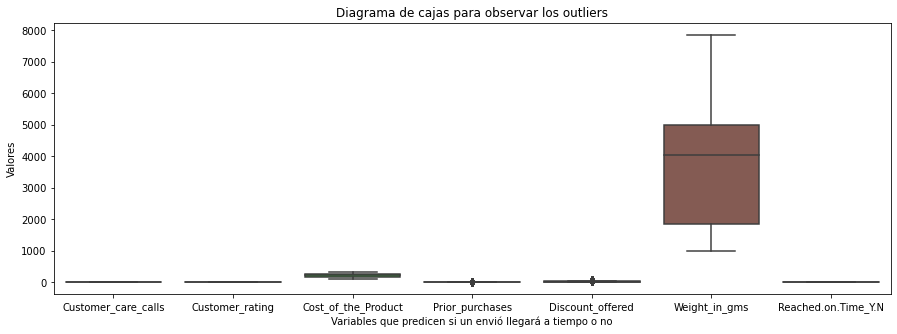

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(data= data_train)
plt.title('Diagrama de cajas para observar los outliers')
plt.xlabel('Variables que predicen si un envió llegará a tiempo o no')
plt.ylabel('Valores');

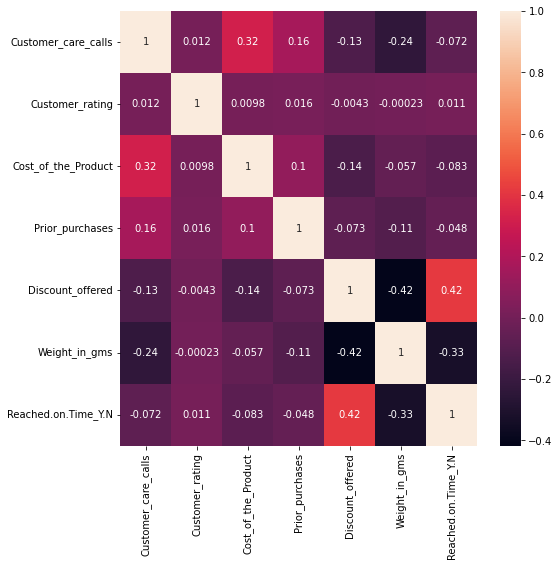

In [40]:
plt.figure(figsize=(8,8))
sns.heatmap(data_train.corr(),annot=True);

In [46]:
#Separamos las etiquetas de las variables categoricas y las numéricas
cat=[]
num=[]
for i in data_train.columns:
  if data_train[i].dtype == 'object':
    cat.append(i)
  else:
    num.append(i)
    
print(f'Categóricas = {cat}')
print(f'Numéricas = {num}')

Categóricas = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
Numéricas = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


In [47]:
#
num.pop()
###cat.append('Reached.on.Time_Y.N')

'Reached.on.Time_Y.N'

In [49]:
data_train[cat].describe().T

,count,unique,top,freq
Warehouse_block,8999,5,F,2999
Mode_of_Shipment,8999,3,Ship,6122
Product_importance,8999,3,low,4308
Gender,8999,2,F,4540


In [50]:
data_train[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,8999.0,4.015113,1.138934,2.0,3.0,4.0,5.0,7.0
Customer_rating,8999.0,2.994999,1.413143,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,8999.0,208.561507,48.289172,96.0,168.0,211.0,249.5,310.0
Prior_purchases,8999.0,3.511501,1.532074,2.0,3.0,3.0,4.0,10.0
Discount_offered,8999.0,15.097678,17.400040,1.0,4.0,8.0,19.0,65.0
Weight_in_gms,8999.0,3584.364596,1614.750194,1001.0,1857.0,4046.0,4999.5,7846.0


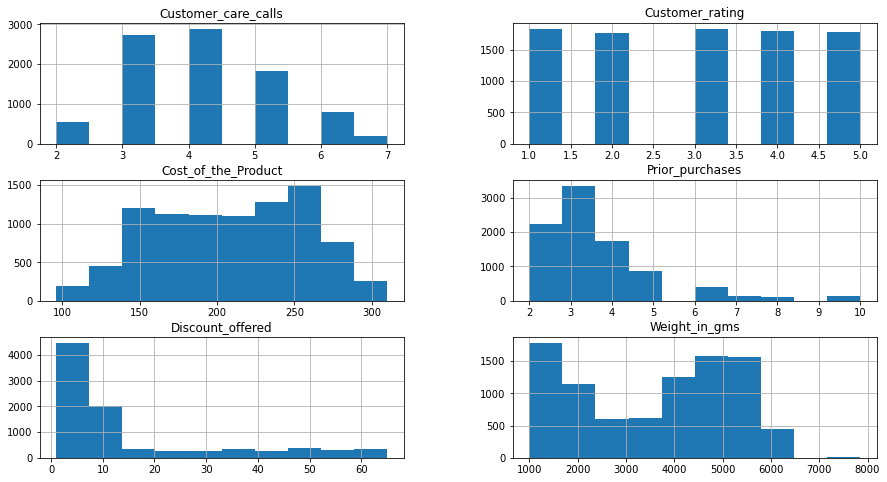

In [51]:
data_train[num].hist(figsize=(15,8));

### One Hot encoding y Scaling en los datos

In [52]:
#Realizamos una copia del df
df_encoded = data_train.copy()

#

df_encoded = pd.get_dummies(df_encoded, drop_first=True)
df_encoded.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,4,2,177,3,44,1233,1,0,0,1,0,0,0,1,0,0
1,4,5,216,2,59,3088,1,0,0,0,1,0,0,1,0,1
2,2,2,183,4,48,3374,1,0,0,0,0,0,0,1,0,1
3,3,3,176,4,10,1177,1,1,0,0,0,0,0,0,1,1
4,2,2,184,3,46,2484,1,0,1,0,0,0,0,0,1,0


In [53]:
#importando StandarScale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_encoded = df_encoded[num]
scaled_encoded = scaler.fit_transform(scaled_encoded)

#Ahora creamos un
scaled = df_encoded.copy()
scaled[num] = scaled_encoded

scaled

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,-0.013270,-0.704143,-0.653630,-0.333881,1.661141,-1.456259,1,0,0,1,0,0,0,1,0,0
1,-0.013270,1.418902,0.154049,-0.986627,2.523256,-0.307411,1,0,0,0,1,0,0,1,0,1
2,-1.769395,-0.704143,-0.529372,0.318866,1.891039,-0.130284,1,0,0,0,0,0,0,1,0,1
3,-0.891333,0.003539,-0.674340,0.318866,-0.292986,-1.490942,1,1,0,0,0,0,0,0,1,1
4,-1.769395,-0.704143,-0.508662,-0.333881,1.776090,-0.681484,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,-0.891333,-1.411824,0.174759,-0.333881,-0.810254,0.367034,1,0,0,1,0,0,1,1,0,0
8995,0.864793,0.003539,0.485405,-0.333881,-0.695306,0.583179,0,0,0,0,1,0,1,0,1,1
8996,-0.013270,1.418902,1.065277,-0.333881,-0.522883,0.394284,0,0,0,0,0,0,1,0,1,0
8997,-0.013270,-0.704143,-0.508662,-0.333881,-0.580357,1.453331,1,1,0,0,0,0,1,0,1,0


## Train Test Split

In [71]:
from sklearn.model_selection import train_test_split

X = scaled.drop(['Reached.on.Time_Y.N'], axis = 1).values
y = scaled['Reached.on.Time_Y.N'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6749, 15) (2250, 15) (6749,) (2250,)


## Logistic regresion

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

y_test_pred_prob=model_lr.predict_proba(X_test)
pd.DataFrame(y_test_pred_prob).head()

,0,1
0,0.361987,0.638013
1,0.736821,0.263179
2,0.003080,0.996920
3,0.682014,0.317986
4,0.147706,0.852294


In [57]:
#Exhaustividad / Recall 
precision = recall_score(y_test, y_test_pred, average= None)
print(precision)

[0.55159236 0.72627986]


## Calculamos la curva ROC

AUC: 0.765


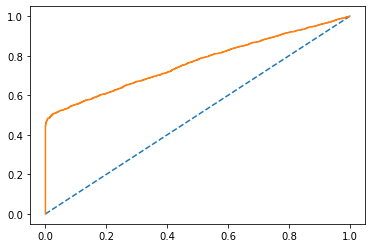

In [58]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# predecimos las probabilidades
probs = model_lr.predict_proba(X_train)

# manteninedo las prob. positivas
probs = probs[:, 1]

# calculamos el AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

# Calculamos la curva ROC
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# Trazamos la curva ROC
plt.plot(train_fpr, train_tpr)

In [62]:
#y_test_pred
df = pd.DataFrame(y_test_pred)
df

,0
0,1
1,0
2,1
3,0
4,1
...,...
2245,1
2246,1
2247,0
2248,0
